## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# model selection and preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
#models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB



#Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


# metrics
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

# To deal with those annoying deprecated warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
raw_data = pd.read_csv("D:\Document\Datasets\heart.csv")

NameError: name 'pd' is not defined

In [ ]:
raw_data_copy = raw_data

In [ ]:
raw_data_copy.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
raw_data_copy.shape

(303, 14)

# Data Description

In [ ]:
raw_data_copy.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


NO null values

In [ ]:
raw_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Duplicates

In [ ]:
raw_data_copy.drop_duplicates(inplace=True)
raw_data_copy.reset_index(drop=True, inplace=True)
raw_data_copy.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Checking if the data is balanced for output or not

In [ ]:
sns.countplot(raw_data_copy['output'])

In [ ]:
ax= px.pie(raw_data_copy['output'], names= "output",title= "Output")
ax.show()

# EDA

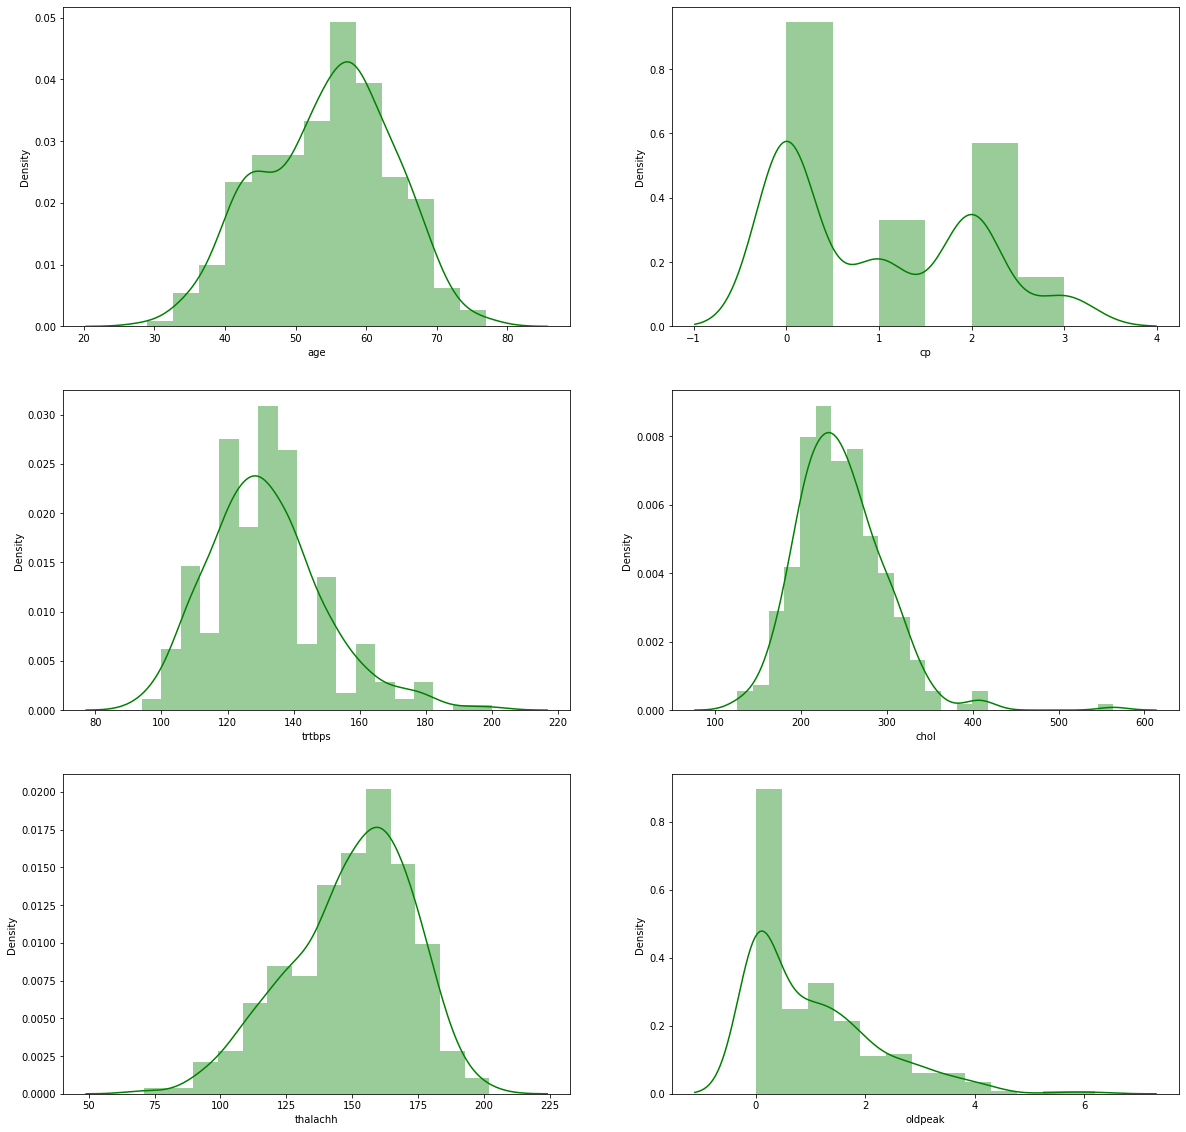

In [ ]:
columns=["age","cp","trtbps","chol","thalachh","oldpeak"]
fig, ax1 = plt.subplots(3,2, figsize=(20,20))
k = 0
for i in range(3):
    for j in range(2):
            sns.distplot(raw_data_copy[columns[k]], ax = ax1[i][j], color = 'green')
            k += 1
plt.show()

Only the "OldPeak" is the only feature which is highly skewewd.

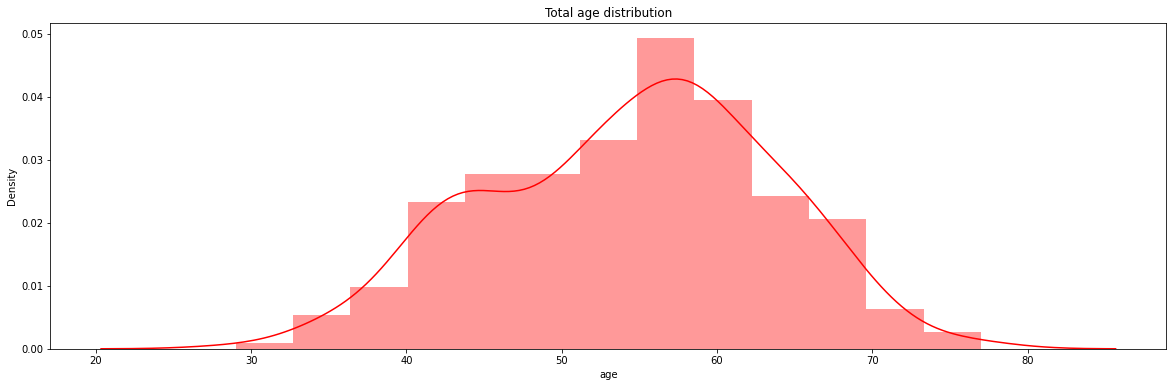

In [ ]:
plt.figure(figsize=(20,6))
sns.distplot(raw_data_copy["age"],color="red",bins="auto")
plt.title("Total age distribution")
plt.show()

In [ ]:
ax= px.pie(raw_data_copy['sex'], names= "sex",title= "Gender Distribution")
ax.show()

In [ ]:
data1 = raw_data_copy[raw_data_copy['sex'] == 1].reset_index()
data0 = raw_data_copy[raw_data_copy['sex'] == 0].reset_index()

In [ ]:

ax = px.pie(data1, names = 'output',title= "Fatality in Gender 1")
ax.show()

In [ ]:
ax = px.pie(data0,names = "output",title="Fatality in Gender 0")
ax.show()

We can clearly see that gender "0" is high risk at heart attack

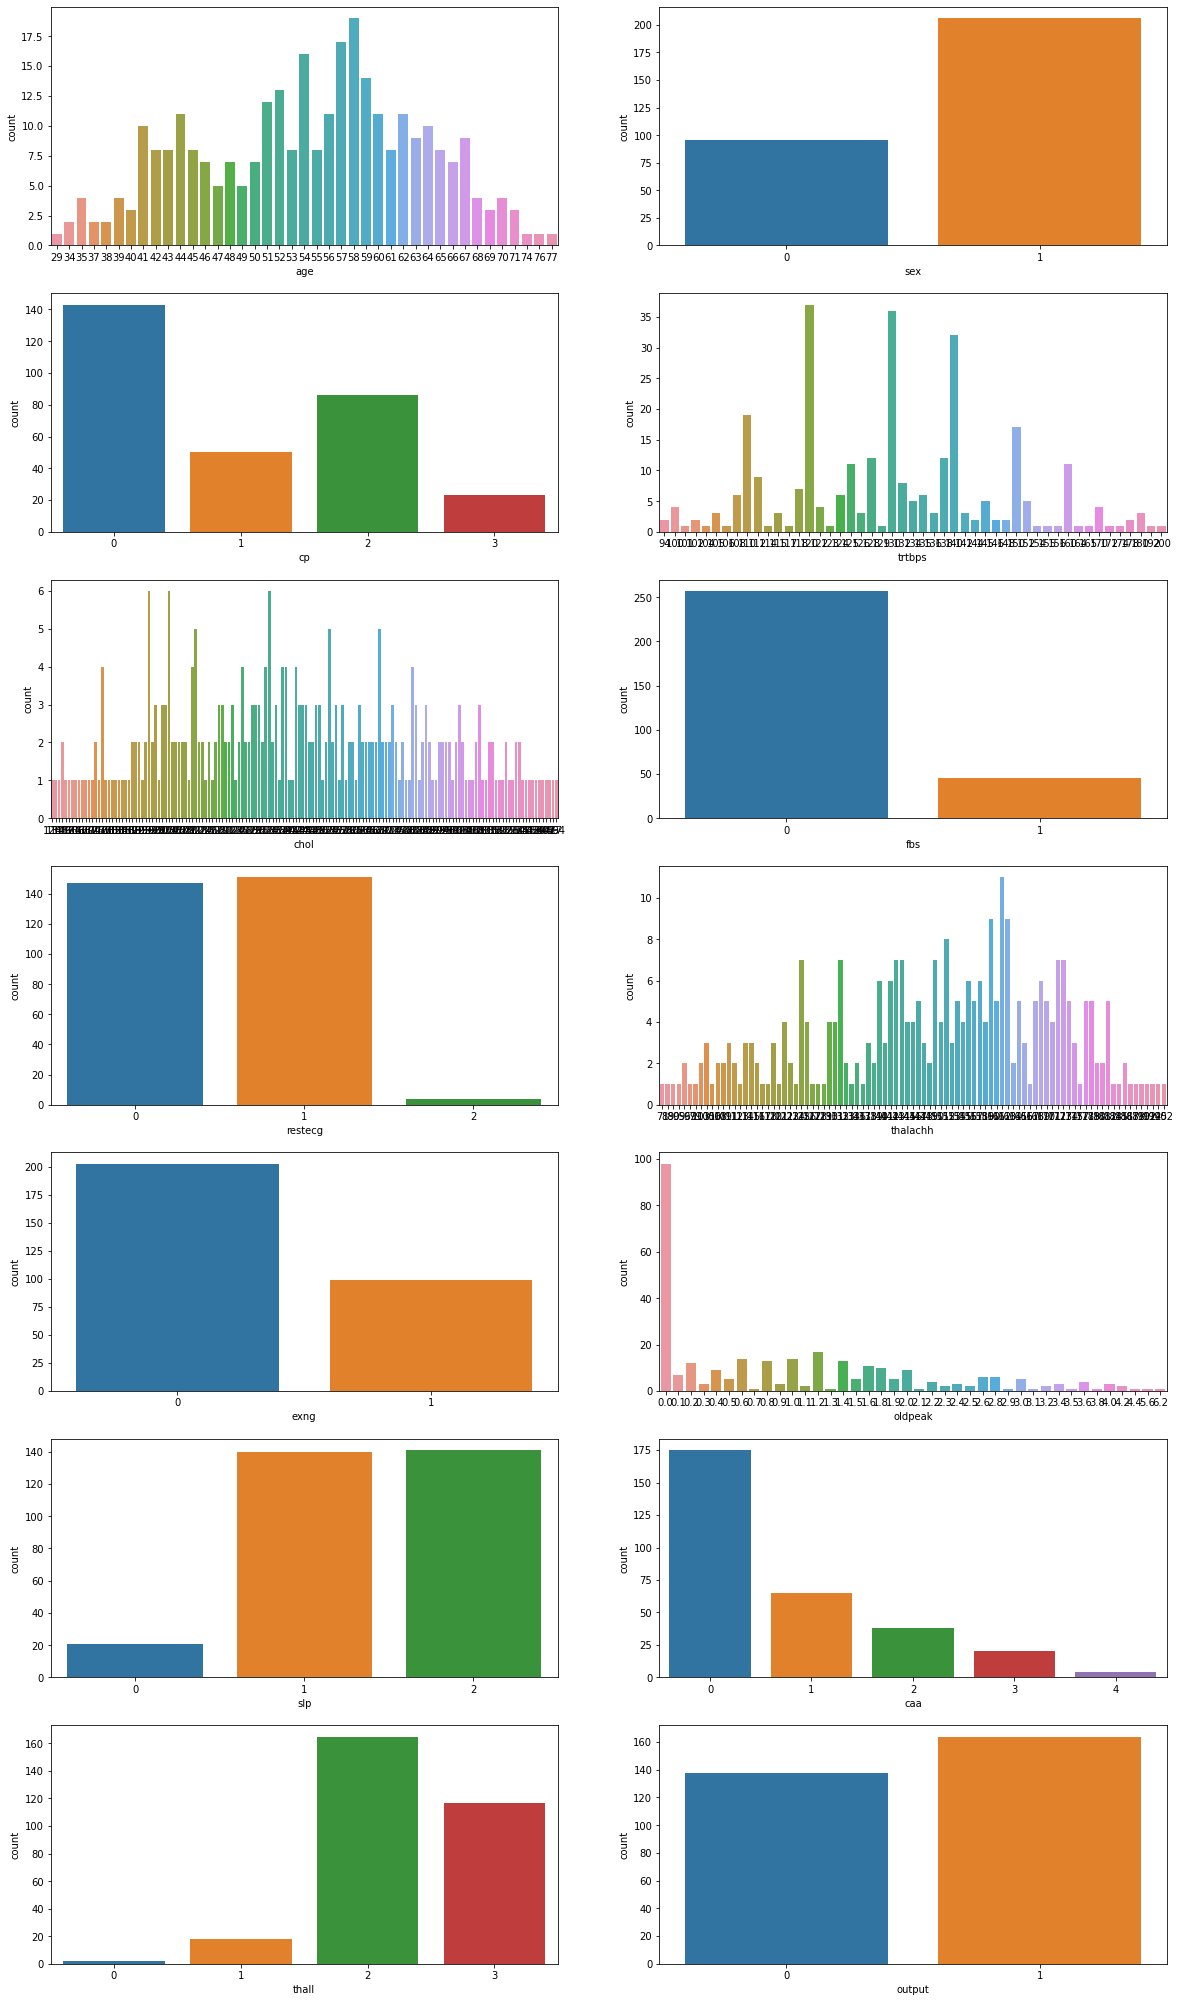

In [ ]:
fig,ax = plt.subplots(7,2,figsize = (20,36))
k = 0
for i in range(7):
    for j in range(2):
        sns.countplot(raw_data_copy[raw_data_copy.columns[k]],ax = ax[i][j])
        k+=1
plt.show()

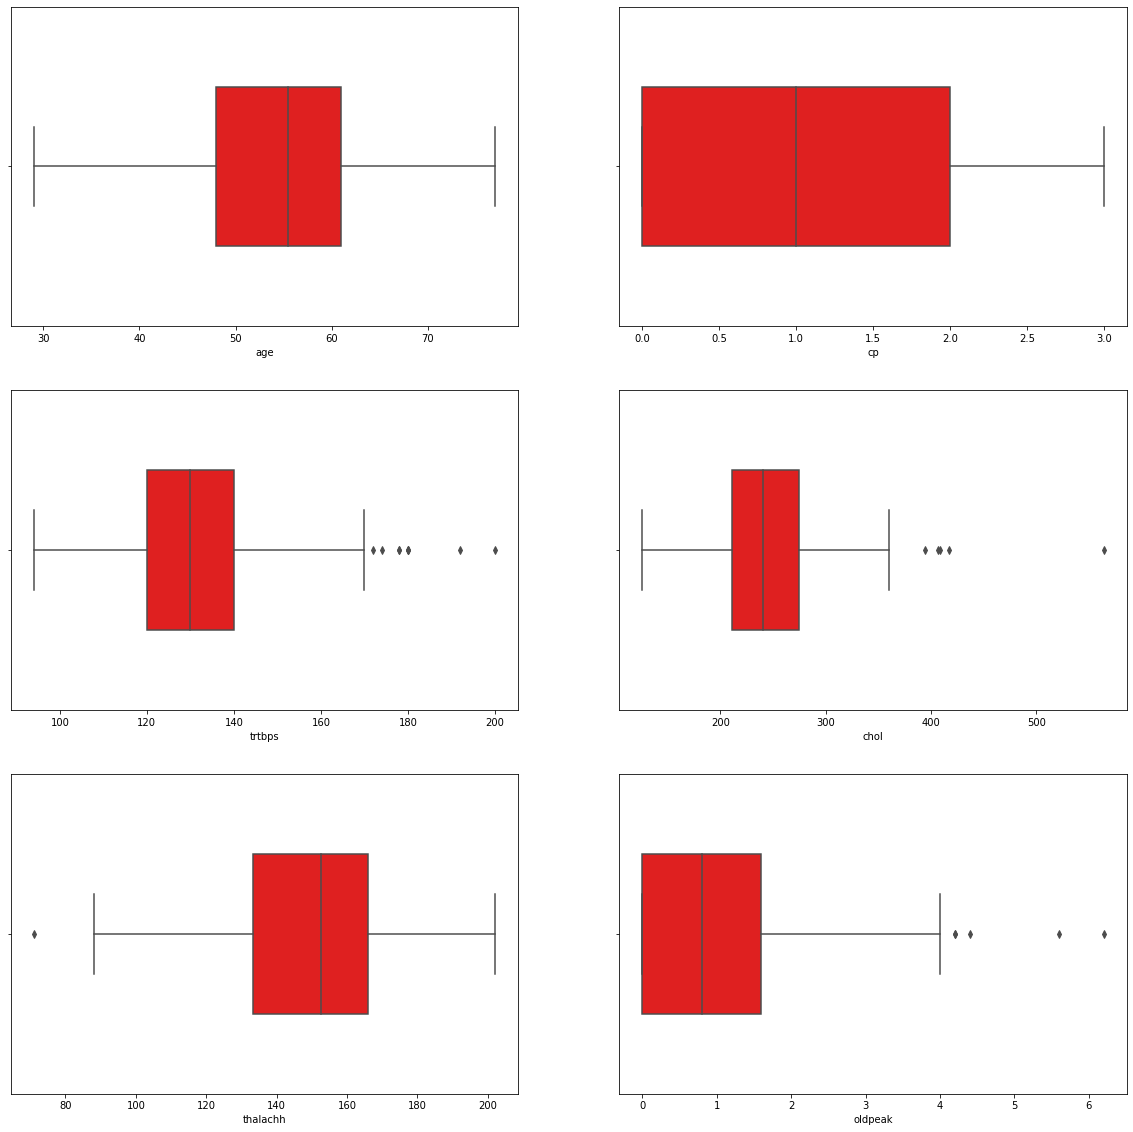

In [ ]:
columns=["age","cp","trtbps","chol","thalachh","oldpeak"]
fig, ax1 = plt.subplots(3,2, figsize=(20,20))
k = 0
for i in range(3):
    for j in range(2):
            sns.boxplot(raw_data_copy[columns[k]], ax = ax1[i][j], color = 'red',width = 0.5)
            k += 1
plt.show()

Here are some outliers present in our features

# Data Pre-Processing

In [ ]:
corr = raw_data_copy.corr()

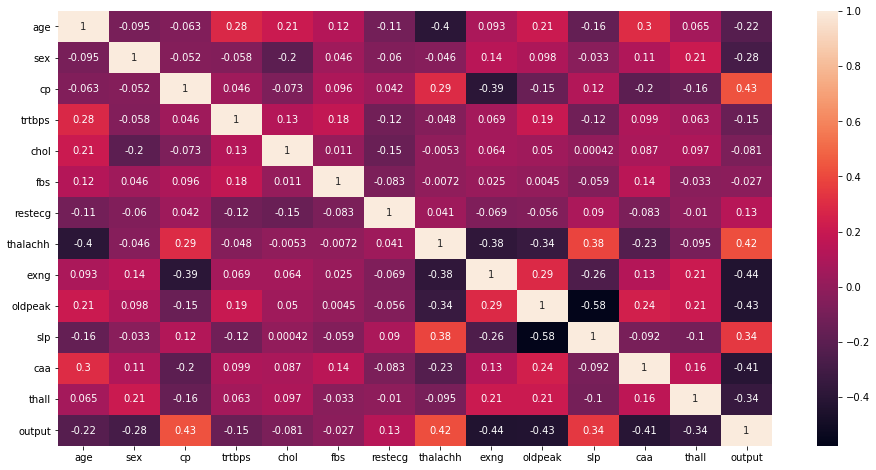

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
corr['output']

age        -0.221476
sex        -0.283609
cp          0.432080
trtbps     -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalachh    0.419955
exng       -0.435601
oldpeak    -0.429146
slp         0.343940
caa        -0.408992
thall      -0.343101
output      1.000000
Name: output, dtype: float64

We can see that the least related to our 'output' are 'fbs' and 'chol'.

# Outliers


Outliers:
It is the data that is way too large or way too low in respect of the other data.It highly affects the measures as a lot measure directly depend on all the data points.

IQR(inter quartile range):
It is the difference between Q1 and Q3 and is the range of middle 50% of the data. Ways to identify outliers:

- Find Q1,Q2,Q3
- Find IQR = Q3 - Q1
- Multiply IQR by 1.5
- Subtract this number from Q1 and add this number to Q3
- If the point lie in the above acquired range then it is not an outlier, if doesn't then it is an outlier.

In [ ]:
# Q1 
q1 = raw_data_copy.quantile(0.25)
# Q3
q3 = raw_data_copy.quantile(0.75)
# IQR
IQR = q3 - q1
# Outlier range
upper = q3 + IQR * 1.5
lower = q1 - IQR * 1.5
upper_dict = dict(upper)
lower_dict = dict(lower)

In [ ]:
for i,v in raw_data_copy.items():
    v_col = v[( v<= lower_dict[i]) | (v >= upper_dict[i])]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(raw_data_copy)[0]
    print("Column {} outliers = {} => {}%".format(i,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column sex outliers = 0 => 0.0%
Column cp outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.305%
Column chol outliers = 5 => 1.656%
Column fbs outliers = 302 => 100.0%
Column restecg outliers = 0 => 0.0%
Column thalachh outliers = 1 => 0.331%
Column exng outliers = 0 => 0.0%
Column oldpeak outliers = 8 => 2.649%
Column slp outliers = 0 => 0.0%
Column caa outliers = 24 => 7.947%
Column thall outliers = 2 => 0.662%
Column output outliers = 0 => 0.0%


We have "caa" , "trtbps" ,"chol" and "oldpeak" with some amount of outliers.

### Since dataset is already very small , we won't be dealing with them by removing the outliers rather we will replace them with acceptable upper or lower limit.

In [ ]:
raw_data_copy['trtbps'].replace(list(raw_data_copy[raw_data_copy['trtbps'] > upper_dict['trtbps']].trtbps) ,upper_dict['trtbps'],inplace=True)
raw_data_copy['chol'].replace(list(raw_data_copy[raw_data_copy['chol'] > upper_dict['chol']].chol) ,upper_dict['chol'],inplace=True)
raw_data_copy['oldpeak'].replace(list(raw_data_copy[raw_data_copy['oldpeak'] > upper_dict['oldpeak']].oldpeak) ,upper_dict['oldpeak'],inplace=True)

In [ ]:
raw_data_copy['trtbps'].replace(list(raw_data_copy[raw_data_copy['trtbps'] < lower_dict['trtbps']].trtbps) ,lower_dict['trtbps'],inplace=True)
raw_data_copy['chol'].replace(list(raw_data_copy[raw_data_copy['chol'] < lower_dict['chol']].chol) ,lower_dict['chol'],inplace=True)
raw_data_copy['oldpeak'].replace(list(raw_data_copy[raw_data_copy['oldpeak'] < lower_dict['oldpeak']].oldpeak) ,lower_dict['oldpeak'],inplace=True)

# Train Test Split

In [ ]:
# This standardisation technique uses median and interquartile range for standardisation rather than mean and variance.
scaler = RobustScaler()
robust_df = scaler.fit_transform(raw_data_copy.iloc[:,:13])
robust_df = pd.DataFrame(robust_df, columns =['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall'])
robust_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.576923,0.0,1.0,0.75,-0.117647,1.0,-1.0,-0.076336,0.0,0.9375,-1.0,0.0,-1.0
1,-1.423077,0.0,0.5,0.00,0.149020,0.0,0.0,1.053435,0.0,1.6875,-1.0,0.0,0.0
2,-1.115385,-1.0,0.0,0.00,-0.572549,0.0,-1.0,0.595420,0.0,0.3750,1.0,0.0,0.0
3,0.038462,0.0,0.0,-0.50,-0.070588,0.0,0.0,0.778626,0.0,0.0000,1.0,0.0,0.0
4,0.115385,-1.0,-0.5,-0.50,1.780392,0.0,0.0,0.320611,1.0,-0.1250,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.115385,-1.0,-0.5,0.50,0.007843,0.0,0.0,-0.900763,1.0,-0.3750,0.0,0.0,1.0
298,-0.807692,0.0,1.0,-1.00,0.368627,0.0,0.0,-0.625954,0.0,0.2500,0.0,0.0,1.0
299,0.961538,0.0,-0.5,0.70,-0.745098,1.0,0.0,-0.351145,0.0,1.6250,0.0,2.0,1.0
300,0.115385,0.0,-0.5,0.00,-1.717647,0.0,0.0,-1.145038,1.0,0.2500,0.0,1.0,1.0


In [ ]:
X = robust_df.values
# X = raw_data_copy.iloc[:,1:-1].values

Y = raw_data_copy['output'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
# Normalization of data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression

In [ ]:
model_LG = LogisticRegression(random_state=0)
model_LG.fit(X_train,Y_train)
Y_pred = model_LG.predict(X_test)
model_LG_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



# KNN

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=7)
model_KNN.fit(X_train,Y_train)
Y_pred = model_KNN.predict(X_test)
model_KNN_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.94      0.91      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



# Gaussian NB

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train,Y_train)
  
predicted = model_NB.predict(X_test)
print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



# SVM

In [ ]:
model_svm=SVC(kernel="rbf",random_state=0)
model_svm.fit(X_train,Y_train)
Y_pred=model_svm.predict(X_test)

model_svm_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.94      0.91      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



# Random Forest Classifier

In [ ]:

model_RF = RandomForestClassifier(n_estimators = 100, random_state = 0)  
model_RF.fit(X_train, Y_train)  
predicted = model_RF.predict(X_test)
print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.90      0.82      0.86        34

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



# XGboost Classifier

In [ ]:
model_XG = xgb.XGBClassifier(use_label_encoder=False)
model_XG.fit(X_train, Y_train)
   
predicted = model_XG.predict(X_test)
   
print(classification_report(Y_test,predicted))

[09:56:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.84      0.79      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



# Ada Boost Classifier

In [ ]:
model_ADA=AdaBoostClassifier(learning_rate= 0.15,n_estimators= 25,random_state=0)
model_ADA.fit(X_train,Y_train)
Y_pred= model_ADA.predict(X_test)


model_ADA_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# Gradient Boost Classifier

In [ ]:

model_GB= GradientBoostingClassifier(random_state=0,n_estimators=20,learning_rate=0.29,loss="deviance")
model_GB.fit(X_train,Y_train)
Y_pred= model_GB.predict(X_test)

model_GB_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.90      0.79      0.84        34

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [ ]:

lgbm = LGBMClassifier(random_state=0)

lgbm.fit(X_train, Y_train)

y_pred = lgbm.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.90      0.79      0.84        34

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# Applying Grid Search on SVM

In [ ]:
param_grid = {'C': [0.1,1,10,100,1000], 
              'degree' : [4,5,6,7,8,9],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 5)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, degree=4, kernel=rbf .....................................
[CV] ......... C=0.1, degree=4, kernel=rbf, score=0.755, total=   0.0s
[CV] C=0.1, degree=4, kernel=rbf .....................................
[CV] ......... C=0.1, degree=4, kernel=rbf, score=0.833, total=   0.0s
[CV] C=0.1, degree=4, kernel=rbf .....................................
[CV] ......... C=0.1, degree=4, kernel=rbf, score=0.792, total=   0.0s
[CV] C=0.1, degree=4, kernel=rbf .....................................
[CV] ......... C=0.1, degree=4, kernel=rbf, score=0.812, total=   0.0s
[CV] C=0.1, degree=4, kernel=rbf .....................................
[CV] ......... C=0.1, degree=4, kernel=rbf, score=0.812, total=   0.0s
[CV] C=0.1, degree=5, kernel=rbf .....................................
[CV] ......... C=0.1, degree=5, kernel=rbf, score=0.755, total=   0.0s
[CV] C=0.1, degree=5, kernel=rbf .....................................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ........... C=1, degree=9, kernel=rbf, score=0.735, total=   0.0s
[CV] C=1, degree=9, kernel=rbf .......................................
[CV] ........... C=1, degree=9, kernel=rbf, score=0.833, total=   0.0s
[CV] C=1, degree=9, kernel=rbf .......................................
[CV] ........... C=1, degree=9, kernel=rbf, score=0.833, total=   0.0s
[CV] C=1, degree=9, kernel=rbf .......................................
[CV] ........... C=1, degree=9, kernel=rbf, score=0.812, total=   0.0s
[CV] C=1, degree=9, kernel=rbf .......................................
[CV] ........... C=1, degree=9, kernel=rbf, score=0.812, total=   0.0s
[CV] C=10, degree=4, kernel=rbf ......................................
[CV] .......... C=10, degree=4, kernel=rbf, score=0.714, total=   0.0s
[CV] C=10, degree=4, kernel=rbf ......................................
[CV] .......... C=10, degree=4, kernel=rbf, score=0.771, total=   0.0s
[CV] C=10, degree=4, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'degree': [4, 5, 6, 7, 8, 9], 'kernel': ['rbf']},
             verbose=5)

In [ ]:

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'degree': 4, 'kernel': 'rbf'}
SVC(C=1, degree=4)


In [ ]:

grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.94      0.91      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [ ]:
accuracy_score(Y_test,grid_predictions) * 100

91.80327868852459

# Conclusion:
* Most of the models are working brilliantly on this dataset after normalising the dataset.
* SVM and ADAboost are particularly best models.
* After using Grid search , Adaboost beats SVM.
* Only looking at accuracy as evaluation metrics in this case might be deadly as we need to look for **False Negative**.
* Hence , we are looking at complete classification report , especisally **Recall**